
## Agenda

1. Refresh your memory on how to do linear regression in scikit-learn
2. Attempt to use linear regression for classification
3. Show you why logistic regression is a better alternative for classification
4. Brief overview of probability, odds, e, log, and log-odds
5. Explain the form of logistic regression
6. Explain how to interpret logistic regression coefficients
7. Compare logistic regression with other models

## Part 1: Predicting a Continuous Response

In [1]:
# glass identification dataset
import pandas as pd
file = './data/glass.data'
col_names = ['id','ri','na','mg','al','si','k','ca','ba','fe','glass_type']
glass = pd.read_csv(file, names=col_names, index_col='id')
glass['assorted'] = glass.glass_type.map({1:0, 2:0, 3:0, 4:0, 5:1, 6:1, 7:1})

In [2]:
# Reading the first 5 entries of the DataFrame
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,assorted
id,,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,0
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,0
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,0
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,0
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,0


## Trivia!
Pretend that we want to predict **ri**, and our only feature is **al**. How would we do it using machine learning? 

How would we **visualize** this model? We will create a scatter plot with **al** on the x-axis and **ri** on the y-axis, and draw the line of best fit.

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

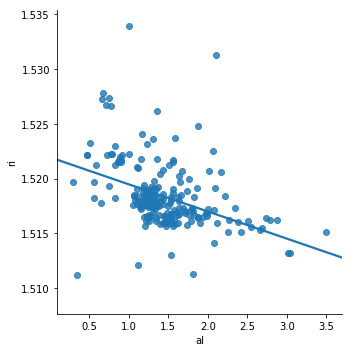

In [4]:
sns.lmplot(x='al', y='ri', data=glass, ci=None)

If we had an **al** value of 2, what would we predict for **ri**? Roughly 1.517.

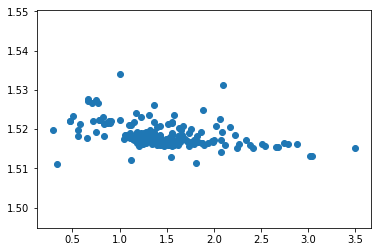

In [5]:
# scatter plot using Matplotlib
plt.scatter(glass.al, glass.ri)

In [ ]:
# fit a linear regression model
from sklearn.linear_model import LinearRegression
import numpy as np
linreg = LinearRegression()
feature_cols = ['al']
X = glass[feature_cols]
y = glass.ri
linreg.fit(X, y)

In [ ]:
# look at the coefficients to get the equation for the line, but then how do you plot the line?
print(linreg.intercept_)
print(linreg.coef_)

In [ ]:
# you could make predictions for arbitrary points, and then plot a line connecting them. 
# np.shape(np.array([1]).reshape(-1,1))
print(linreg.predict(np.array([1]).reshape(-1,1)))
print(linreg.predict(np.array([2]).reshape(-1,1)))
print(linreg.predict(np.array([3]).reshape(-1,1)))

In [ ]:
# or you could make predictions for all values of X, and then plot those predictions connected by a line
ri_pred = linreg.predict(X)
plt.plot(glass.al, ri_pred, color='red')

In [ ]:
# put the plots together
plt.scatter(glass.al, glass.ri)
plt.plot(glass.al, ri_pred, color='red')

### Refresher: interpreting linear regression coefficients

Linear regression equation: $y = \beta_0 + \beta_1x$

In [ ]:
# compute prediction for al=2 using the equation
linreg.intercept_ + linreg.coef_ * 2

In [ ]:
# compute prediction for al=2 using the predict method
linreg.predict(np.array([2]).reshape(-1,1))

In [ ]:
# examine coefficient for al
print(feature_cols, linreg.coef_)

**Interpretation:** A 1 unit increase in 'al' is associated with a 0.0025 unit decrease in 'ri'.

In [ ]:
# increasing al by 1 (so that al=3) decreases ri by 0.0025
1.51699012 - 0.0024776063874696243

In [ ]:
# compute prediction for al=3 using the predict method
linreg.predict(np.array([3]).reshape(-1,1))

## Part 2: Predicting a Categorical Response

Let's change our task, so that we're predicting **assorted** using **al**. Let's visualize the relationship to figure out how to do this:

In [ ]:
plt.scatter(glass.al, glass.assorted)

Let's draw a **regression line**, like we did before:

In [ ]:
# fit a linear regression model and store the predictions
feature_cols = ['al']
X = glass[feature_cols]
y = glass.assorted
linreg.fit(X, y)
assorted_pred = linreg.predict(X)

In [ ]:
# scatter plot that includes the regression line
plt.scatter(glass.al, glass.assorted)
plt.plot(glass.al, assorted_pred, color='red')

If **al=3**, what class do we predict for assorted? **1**

If **al=1.5**, what class do we predict for assorted? **0**

So, we predict the 0 class for **lower** values of al, and the 1 class for **higher** values of al. What's our cutoff value? Around **al=2**, because that's where the linear regression line crosses the midpoint between predicting class 0 and class 1.

So, we'll say that if **assorted_pred >= 0.5**, we predict a class of **1**, else we predict a class of **0**.

In [ ]:
# understanding np.where
import numpy as np
nums = np.array([5, 15, 8])

In [ ]:
# np.where returns the first value if the condition is True, and the second value if the condition is False
np.where(nums > 10, 'big', 'small')

In [ ]:
# examine the predictions
assorted_pred[:10]

In [ ]:
# transform predictions to 1 or 0
assorted_pred_class = np.where(assorted_pred >= 0.5, 1, 0)
assorted_pred_class

In [ ]:
# plot the class predictions
plt.scatter(glass.al, glass.assorted)
plt.plot(glass.al, assorted_pred_class, color='red')

What went wrong? This is a line plot, and it connects points in the order they are found. Let's sort the DataFrame by "al" to fix this:

In [ ]:
# add predicted class to DataFrame
glass['assorted_pred_class'] = assorted_pred_class

# sort DataFrame by al
glass.sort_values('al', inplace=True)

In [ ]:
# plot the class predictions again
plt.scatter(glass.al, glass.assorted)
plt.plot(glass.al, glass.assorted_pred_class, color='red')

## Rest, we present the theory on the board!